<a href="https://colab.research.google.com/github/Vaycold/Python_ML/blob/main/Clustering/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%EA%B3%BC%20%EA%B5%B0%EC%A7%91%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Goal
 - Clustering의 다양한 알고리즘
 - 시각화 및 차이점

## Data load & Preprocessing

In [1]:
# importing module
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [2]:
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns = iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
# 컬럼명 재 할당
columns_name_list = ['sepal_length','sepal_width', 'petal_length', 'petal_width']
iris_df.columns = columns_name_list
iris_df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [4]:
# 딕셔너리 방법으로도 가능함.

columns_replace_dict = {
    k:v for k,v in zip(iris.feature_names, columns_name_list)
}
iris_df.rename(columns_replace_dict, axis='columns', inplace=True)
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
# target을 추가해보자.
iris_df['target'] = iris.target

In [6]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
# target의 종류를 확인해보자.
iris_df.target.unique()

array([0, 1, 2])

In [8]:
# 결측값 확인해보자
iris_df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target          0
dtype: int64

## 데이터 시각화

In [9]:
iris_df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
target            int64
dtype: object

In [10]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [11]:
import plotly.express as px

# scatter plot 생성
fig = px.scatter(iris_df, x = 'sepal_length', y='sepal_width')

# 그래프 사이즈 조정
fig.update_layout(width = 600, height=500)

fig.show()


In [ ]:
# target은 색깔을 넣어 확인해보자

fig = px.scatter(iris_df, x = 'sepal_length', y='sepal_width', color = 'target')
fig.update_layout(width = 600, height=500)
fig.show()


## Split the dataset


In [62]:
X = iris_df.iloc[:, :-1] # 전체의 row와 마지막 column을 제외한 값을 x로
y = iris_df.iloc[:, -1]
train_x, test_x, train_y, test_y = train_test_split(X, y , test_size = 0.2)

## Clustering Algorithm 
  - K-Means algorithm에 적합한 경우
     - 원형 혹은 구 형태의 분포
     - 동일한 데이터 분포(size of cluster)
     - 동일한 밀집도
     - 군집의 센터에 주로 밀집된 분포
     - noise와 outlier가 적은 분포

  - K-Means의 민감성

   - Noise와 outlier에 민감
   - k값을 직접 설정해줘야함
   - 처음 시작하는 값에 따라 결과에 영향


       - Aggolomerative algorithm 은 k-means를 보완한다.

In [61]:
# Agglomeartive module import ( 계층형 알고리즘)
from sklearn.cluster import AgglomerativeClustering

In [16]:
# Train module 5개의 그룹으로 clustering을 해보자 (3개인 것을 알지만 모른다는 가정하에 진행)

km  = KMeans(n_clusters=5)
km


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [17]:
# train set으로 훈련
km.fit(train_x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [18]:
# 결과물 확인
clusters_array = km.labels_

In [19]:
# 실제 iris 데이터와 훈련된 cluster의 결과를 비교

compare_clusters = dict(zip(clusters_array, train_y))
    

compare_clusters

{0: 1, 1: 0, 2: 2, 3: 2, 4: 1}

In [20]:
train_x.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [21]:
# 훈련된 label을 바탕으로 시각화
fig = px.scatter( x=train_x['petal_width']  ,y=train_x['petal_length'], color = clusters_array)
fig.update_layout(width = 600, height = 500)
fig.show()

In [22]:
# 훈련된 label을 바탕으로 시각화
fig = px.scatter( x=train_x['sepal_length']  ,y=train_x['sepal_width'], color = clusters_array)
fig.update_layout(width = 600, height = 500)
fig.show()

In [23]:
# 최적의 k는 어떻게 구할 까??
km.inertia_  # 이 값은 각 cluster의 중심에서부터 데이터간의 거리를 합한 수치임.
             # 이 값은 최적의 k를 찾는데 사용 될 것임.
             

38.3371866801689

In [24]:
 # elbow method 방법 사용
 k_range = range(1,11)
 distortions = []
 for i in k_range  :
     km = KMeans(n_clusters = i)
     km.fit(train_x)
     distortions.append(km.inertia_.round(2))
print(distortions)

[577.59, 124.09, 63.84, 46.51, 38.36, 31.73, 27.84, 24.52, 22.92, 21.64]


In [25]:
# 이를 그래프로 그린 후 기울기 변화가 가장 작은 지점을 최적의 k로 잡음.
fig = px.line(x = k_range, y=distortions, labels={"x" : "k", "y":"distotrions"})
fig.update_layout(width=800, height = 500)
fig.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.



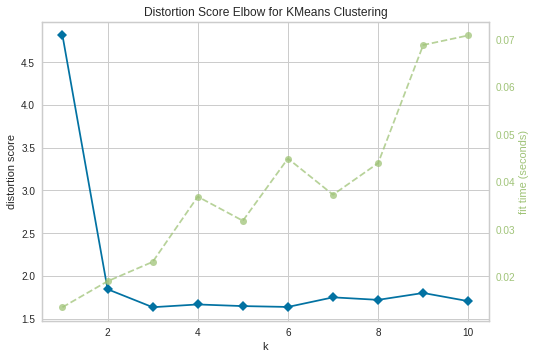

In [26]:
# 최적의 k 찾는 방법(2)
from yellowbrick.cluster import KElbowVisualizer
km = KMeans()
visuailizer = KElbowVisualizer(km, k=(1,11))
visuailizer.fit(train_x)
visuailizer.poof()

In [27]:
# 최적의 k 찾는 방법(3)
# Silhouette method
# - 각 cluster 사이의 거리가 멀고 데이터의 거리가 작을 수록 군집분석 성능이 좋음.
# - silhoutte 값은 -1에서 1사이 
# -1 : clustering의 결과가 좋지않음. 0 : cluster간 변별력이 없음.
from sklearn.metrics import silhouette_score
k_range = range(2, 11)
sil_score = []
for i in k_range  :
     km = KMeans(n_clusters = i)
     km.fit(train_x)
     label = km.predict(train_x)
     sc_value = silhouette_score(np.array(train_x), label, metric = 'euclidean', sample_size =None, random_state=None)
     sil_score.append(sc_value)
sil_score


[0.6877754190090735,
 0.5648197167034092,
 0.5079039148339621,
 0.49193357520937997,
 0.3695336072801721,
 0.3621810980750889,
 0.36055398370043873,
 0.34332029196217057,
 0.32444990966100457]

In [28]:
fig = px.line(x = k_range, y=sil_score, labels={"x" : "k", "y":"silhoutette score"})
fig.update_layout(width=800, height = 500)
fig.show()

In [29]:
# 최적의 k로 k-means model 훈련
k = 3
km = KMeans(n_clusters=3).fit(train_x)
train_cluster = km.labels_
train_cluster

array([2, 0, 1, 0, 1, 1, 2, 2, 2, 2, 2, 0, 2, 1, 0, 0, 0, 2, 1, 0, 1, 2,
       0, 2, 1, 0, 2, 2, 1, 2, 1, 0, 2, 2, 0, 2, 0, 1, 0, 0, 2, 2, 1, 1,
       2, 2, 0, 1, 1, 0, 1, 1, 2, 2, 0, 1, 2, 0, 1, 2, 2, 2, 1, 2, 2, 2,
       1, 1, 1, 1, 2, 2, 1, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0, 1, 1, 1, 1, 2,
       1, 1, 2, 2, 1, 1, 0, 1, 0, 1, 2, 2, 2, 2, 0, 1, 0, 2, 1, 2, 2, 0,
       1, 2, 2, 1, 0, 1, 1, 1, 2, 0], dtype=int32)

In [30]:
# 실제 label과 훈련된 결과 cluster를 그래프로 비교
from plotly.subplots import make_subplots
import plotly.graph_objects as go
fig = make_subplots(rows =1, cols = 2, subplot_titles=('actual', 'k-menas'))
fig.add_trace(
    go.Scatter(x= train_x['sepal_width'],
               y= train_x['sepal_length'],
               mode= 'markers',
               marker = dict(color=train_y )),
              row=1, col=1 
              )
fig.add_trace(
    go.Scatter(x= train_x['sepal_width'],
               y= train_x['sepal_length'],
               mode= 'markers',
               marker = dict(color=train_cluster )),
              row=1, col=2 
              )

fig.update_layout(width= 800,height = 600)
fig.show()

In [31]:
fig = make_subplots(rows =1, cols = 2, subplot_titles=('actual', 'k-menas'))
fig.add_trace(
    go.Scatter(x= train_x['petal_width'],
               y= train_x['petal_length'],
               mode= 'markers',
               marker = dict(color=train_y )),
              row=1, col=1 
              )
fig.add_trace(
    go.Scatter(x= train_x['petal_width'],
               y= train_x['petal_length'],
               mode= 'markers',
               marker = dict(color=train_cluster )),
              row=1, col=2 
              )

fig.update_layout(width= 800,height = 600)
fig.show()

In [33]:
# test set을 사용해 predict 해보자
test_cluster = km.fit_predict(test_x)
test_cluster
fig = make_subplots(rows =1, cols = 2, subplot_titles=('actual', 'k-menas'))
fig.add_trace(
    go.Scatter(x= train_x['petal_width'],
               y= train_x['petal_length'],
               mode= 'markers',
               marker = dict(color=test_y )),
              row=1, col=1 
              )
fig.add_trace(
    go.Scatter(x= train_x['petal_width'],
               y= train_x['petal_length'],
               mode= 'markers',
               marker = dict(color=test_cluster )),
              row=1, col=2 
              )

fig.update_layout(width= 800,height = 600)
fig.show()

In [34]:
test_cluster = km.fit_predict(test_x)
test_cluster
fig = make_subplots(rows =1, cols = 2, subplot_titles=('actual', 'k-menas'))
fig.add_trace(
    go.Scatter(x= train_x['sepal_width'],
               y= train_x['sepal_length'],
               mode= 'markers',
               marker = dict(color=test_y )),
              row=1, col=1 
              )
fig.add_trace(
    go.Scatter(x= train_x['sepal_width'],
               y= train_x['sepal_length'],
               mode= 'markers',
               marker = dict(color=test_cluster )),
              row=1, col=2 
              )

fig.update_layout(width= 800,height = 600)
fig.show()

In [36]:
# 결과를 수치적으로 파악하기
from sklearn.metrics import accuracy_score
train_acc = accuracy_score(train_y, train_cluster)

In [39]:
train_acc

0.08333333333333333

In [42]:
test_acc = accuracy_score(test_y, test_cluster)
test_acc

0.9666666666666667

In [53]:
# 실제 cluster 명과 매칭해서 accuracy 확인하기
import scipy
def find_matching_clusters(cluster_case, actual_labels, cluster_labels) :
    matched_cluster = {}
    actual_case = list(set(actual_labels))
    for i in cluster_case :
        idx = cluster_labels==i
        new_label = scipy.stats.mode(actual_labels[idx])[0][0]
        actual_case.remove(new_label)
        matched_cluster[i] = new_label
        print(f'훈련된 label 명 : {i} >> 가장 빈번한 실제 label명 : {new_label}')
    return matched_cluster

In [54]:
km_train_case = list(set(train_cluster))
print(km_train_case)

[0, 1, 2]


In [55]:
train_param_dict = find_matching_clusters(km_train_case, train_y, train_cluster)
train_param_dict

훈련된 label 명 : 0 >> 가장 빈번한 실제 label명 : 2
훈련된 label 명 : 1 >> 가장 빈번한 실제 label명 : 0
훈련된 label 명 : 2 >> 가장 빈번한 실제 label명 : 1


{0: 2, 1: 0, 2: 1}

In [56]:
# test셋도 동일한 과정을 해보자
km_test_case = list(set(test_cluster))
test_param_dict = find_matching_clusters(km_test_case, test_y, test_cluster)
test_param_dict

훈련된 label 명 : 0 >> 가장 빈번한 실제 label명 : 0
훈련된 label 명 : 1 >> 가장 빈번한 실제 label명 : 1
훈련된 label 명 : 2 >> 가장 빈번한 실제 label명 : 2


{0: 0, 1: 1, 2: 2}

In [58]:
# 위 함수의 결과를 list 를 사용하여 재할당
train_new_labels = [train_param_dict[label] for label in train_cluster]
test_new_labels = [test_param_dict[label] for label in test_cluster]

In [60]:
# 재할당된 cluster 명으로 다시 accruacy_score 계산
train_acc =  accuracy_score(train_y, train_new_labels)
test_acc  =  accuracy_score(test_y, test_new_labels)
print('train_acc : ' , train_acc)
print('test_acc : ' , test_acc)

train_acc :  0.9
test_acc :  0.9666666666666667
